In [12]:
#matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
from scipy.optimize import curve_fit 
import mpltex
mpl.rcParams['font.size'] = 15 
import matplotlib 
matplotlib.rcParams['xtick.major.pad']='8' 
matplotlib.rcParams['ytick.major.pad']='5'
plt.rcParams['text.usetex'] = True 
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
matplotlib.rc('xtick', labelsize=25) 
matplotlib.rc('ytick', labelsize=25) 
matplotlib.rcParams['xtick.major.pad']='8' 
matplotlib.rcParams['ytick.major.pad']='5' 
matplotlib.rcParams.update({'font.size': 15})
#matplotlib.rc('xtick', labelsize=15)
#matplotlib.rc('ytick', labelsize=15)
#matplotlib.rcParams.update({'font.size': 20}) matplotlib.rcParams['xtick.major.pad']='10' matplotlib.rcParams['ytick.major.pad']='7' matplotlib.rcParams['lines.linewidth'] = 2

In [13]:
xEq1 = np.genfromtxt('Equilibrium/tauM(10,1,0.05,0.005)tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3-1).txt')
xEq01 = np.genfromtxt('Equilibrium/tauM01tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3).txt')
xEq001 = np.genfromtxt('Equilibrium/tauM001tau(0.001-0.003-0.005-0.008-0.01-0.05-0.1-0.2-0.3).txt')
xEq0001 = np.genfromtxt('Equilibrium/tauM0001tau(0.001-0.005-0.01-0.05-0.1-0.3-1)U(3-5-8).txt')
xU = np.genfromtxt('Equilibrium/tauM(01-001)tau(0.001-0.005-0.01-0.05-0.1-0.3-1)U(5-8).txt')

In [14]:
#Formula senza termine negativo accopiando H and L friction senza tau_D and tau_m
def Formula2(U0,tau,M,K,a,b):
    return((np.exp(U0))*((3*np.pi/(8*np.sqrt(2)*U0))*(M + b*K*tau**2) + (2*np.sqrt(2)*np.pi/K)*(1/(1 + 3*K*a*tau/(8*4*U0))) +4*np.sqrt(2*M/K)))

#Formula mia tranne lo speed-term che e' simile a Julian cioe con U_0
def Julian(U0,tau,M,K,a,b):
    return((np.exp(U0))*((3*np.pi/(8*np.sqrt(2)*U0))*(M + b*K*tau**2) + (2*np.sqrt(2)*np.pi/K)*(1/(1 + 10*U0*tau)) +4*np.sqrt(2*M/K)))

#Formula 
def Formula3(U0,tau,M, a):
    return((np.exp(U0)/(U0))*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + a*tau)) +2*np.sqrt(M*U0)))

def FormulaProva(U0,tau,M, a,b):
    return((np.exp(U0)/(U0))*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (a*U0+b)*tau)) +2*np.sqrt(M*U0)))

def FormulaProva2(U0,tau,M, a):
    return((np.exp(U0)/(U0))*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (2*U0**a)*tau)) +2*np.sqrt(M*U0)))

In [15]:
def Paper20(U0,tau,M):
    return((np.exp(U0)/(U0))*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (a*U0+b)*tau)) +2*np.sqrt(M*U0)))
def Paper22(U0,tau,M):
    return((np.exp(U0)/(U0))*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (10)*tau)) +2*np.sqrt(M*U0)))

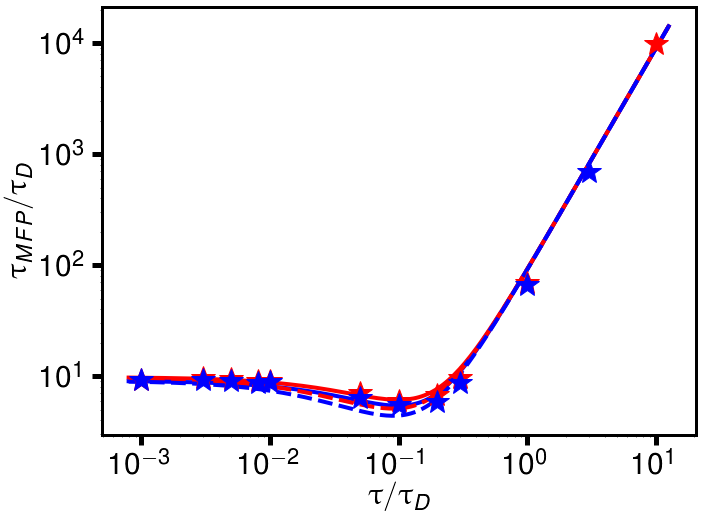

In [16]:
taueq = np.logspace(-3.1,1.1,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqS = [0.001,0.005,0.01,0.05,0.07,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
   
    #ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'r-',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'b-',linewidth=4,markersize=6)
    
    ax.plot(taueq, Formula3(3.,taueq,0.01,16),'r-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula3(3.,taueq,0.005,16),'b-',linewidth=4,markersize=6)
    
    ax.plot(taueq, Formula3(3.,taueq,0.01,30),'r--',linewidth=4,markersize=6)
    ax.plot(taueq, Formula3(3.,taueq,0.005,30),'b--',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),':',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Julian(3.,taueq,0.005,24,64/3,2/3),':',color='y',linewidth=4,markersize=6)

    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    #ax.set_ylim(top=100)
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    
    
    
    #leg2.get_lines()[1].set_linewidth(5)

    #ax.set_ylim([1.5,100])
    

    #fig.savefig('c3.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

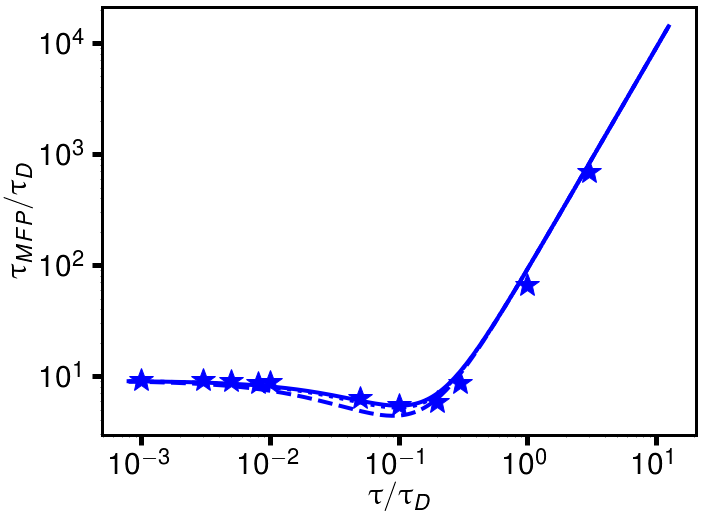

In [17]:
taueq = np.logspace(-3.1,1.1,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqS = [0.001,0.005,0.01,0.05,0.07,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
   
    #ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'r-',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'b-',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.005,24,64/3,2/3),'--',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, FormulaProva(3.,taueq,0.005,2*3,0),':',color='b',linewidth=4,markersize=6)

    #ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    
    
    
    #leg2.get_lines()[1].set_linewidth(5)

    #ax.set_ylim([1.5,100])
    

    #fig.savefig('c3.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

In [18]:
 xEq0001[1,1:]

array([ 8.88427329,  8.57925377,  8.28634707,  6.05914995,  0.        ,
        4.30112418,  4.46025921,  6.6887492 , 61.75608787])

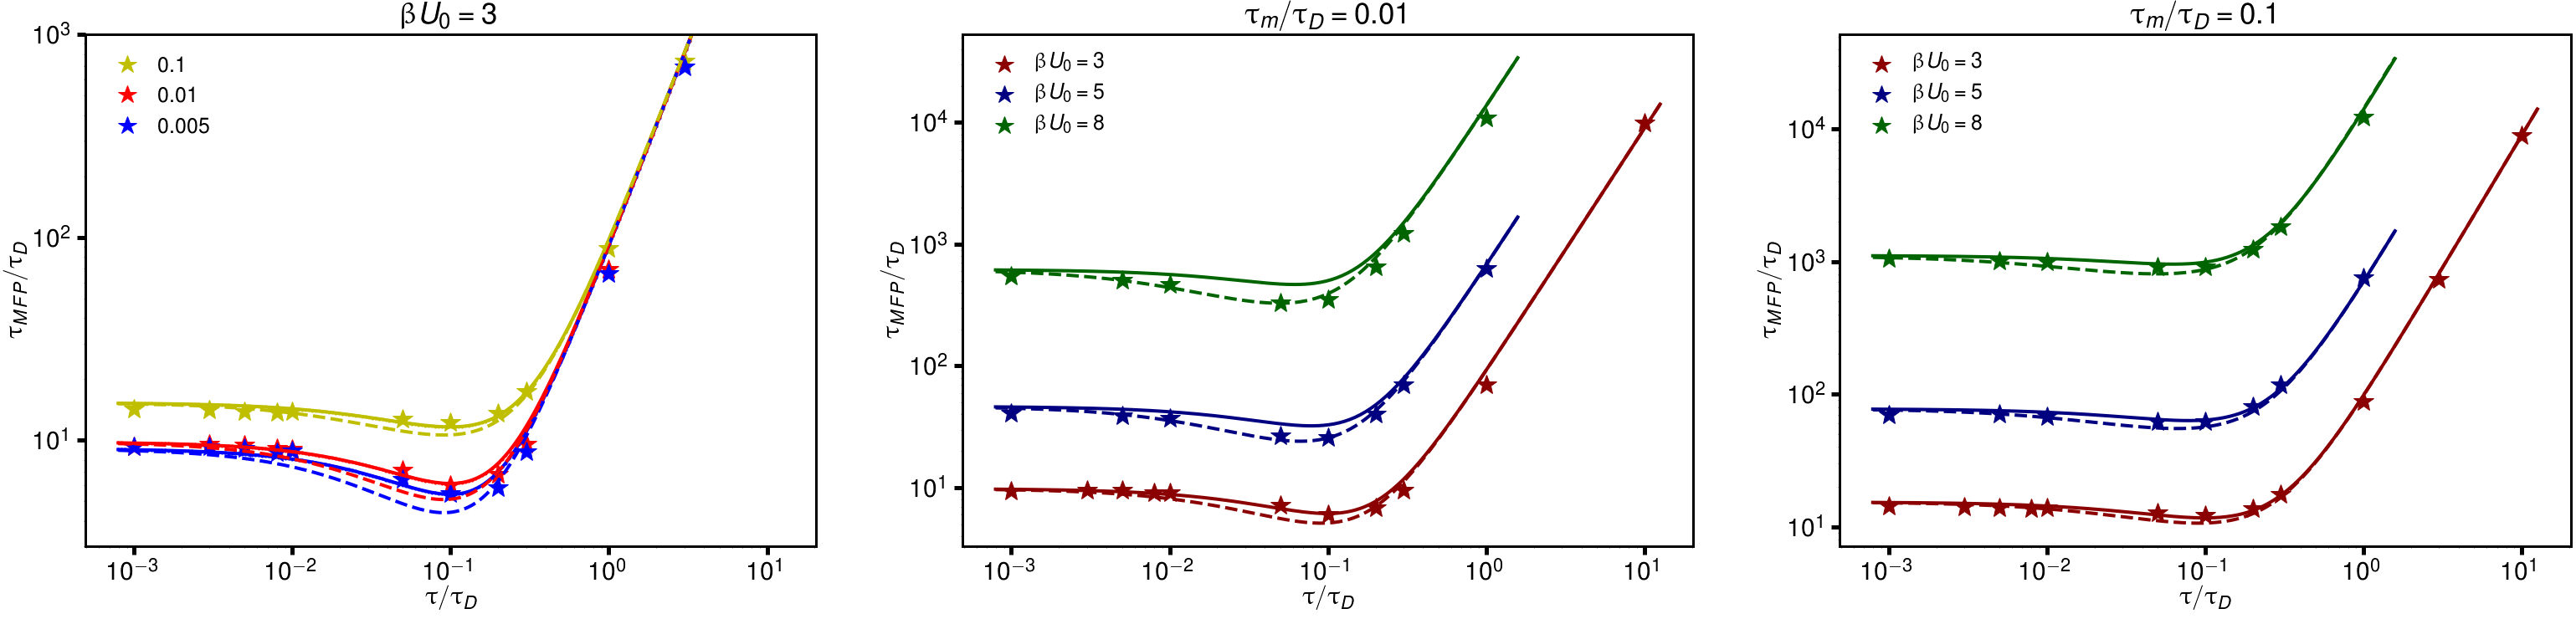

In [19]:
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, axes = plt.subplots(1, 3,figsize=(50,10))
    
    ax = axes[0]

    #ax.plot(tauEq, xEq1[1,1:],'*k',markersize=25,label='$10$')
    #ax.plot(tauEq, xEq1[2,1:],'*g',markersize=25,label='$1$')
    ax.plot(tauEq, xEq01[3,1:],'*y',markersize=25,label='$0.1$')
    #ax.plot(tauEq, xEq1[3,1:],'*m',markersize=25,label='$0.05$')
    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'-',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'-',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'-',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula2(3.,taueq,1,24,64/3,2/3),'-',color='g',linewidth=4,markersize=6)
    
    ax.plot(taueq, Formula3(3.,taueq,0.005,16),'.',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Formula3(3.,taueq,0.01,16),'.',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, Formula3(3.,taueq,0.1,16),'.',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,1,16),'.',color='g',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.005,24,64/3,2/3),'--',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),'--',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.1,24,64/3,2/3),'--',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Julian(3.,taueq,1,24,64/3,2/3),'--',color='g',linewidth=4,markersize=6)
    
    ax.set_ylim([3.,1000])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
    ax = axes[1]

    ax.plot(tauEq, xEq001[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU,xU[3,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU,xU[4,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(5.,taueqU,0.01,40,64/3,2/3),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(8.,taueqU,0.01,65,64/3,2/3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),'--',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(5.,taueqU,0.01,40,64/3,2/3),'--',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(8.,taueqU,0.01,65,64/3,2/3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.01$',fontsize=35)
    
    ax = axes[2]

    ax.plot(tauEq, xEq01[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[1,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[2,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(5.,taueqU,0.1,40,64/3,2/3),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(8.,taueqU,0.1,64,64/3,2/3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.1,24,64/3,2/3),'--',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(5.,taueqU,0.1,40,64/3,2/3),'--',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(8.,taueqU,0.1,65,64/3,2/3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)
    
    #ax.text(0.00000000035,40000,r'(a)', fontsize=30)
    #ax.text(0.0001,40000,r'(b)', fontsize=30)
       
    #ax.set_ylim([1.5,100])
   
    #fig.savefig('EquilibriumUT.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

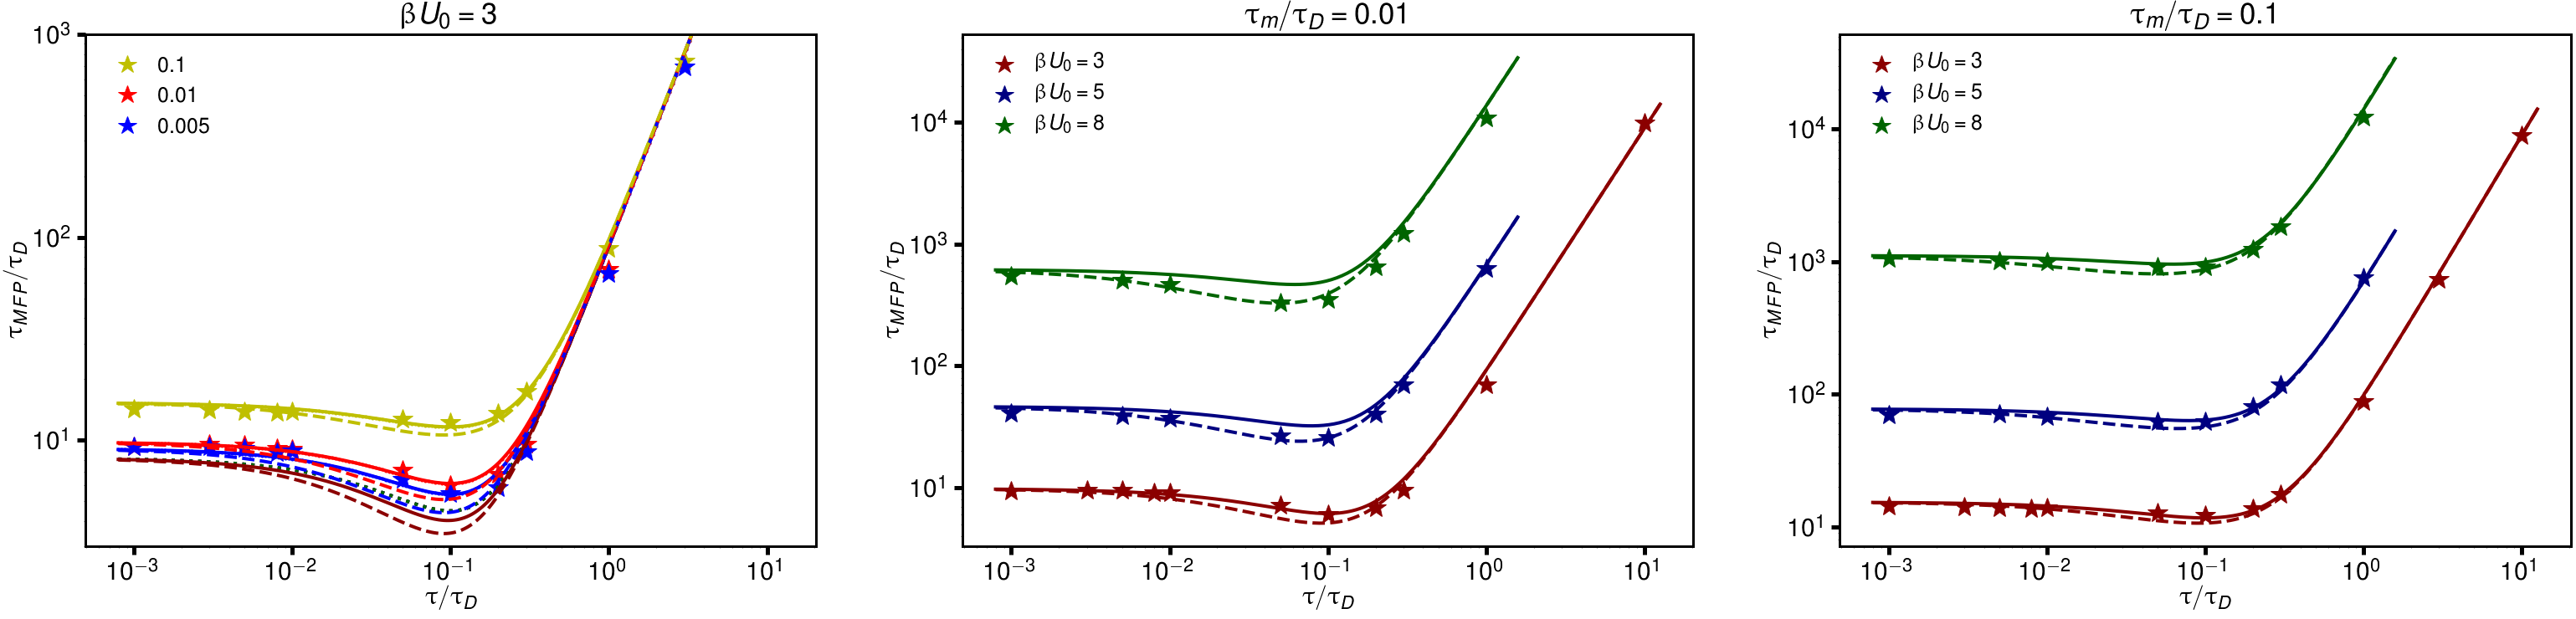

In [20]:
taueqs = np.logspace(-3.1,0.1,200)
taueqss = np.logspace(-3.1,0.05,200)
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, axes = plt.subplots(1, 3,figsize=(50,10))
    
    ax = axes[0]

    #ax.plot(tauEq, xEq1[1,1:],'*k',markersize=25,label='$10$')
    #ax.plot(tauEq, xEq1[2,1:],'*g',markersize=25,label='$1$')
    ax.plot(tauEq, xEq01[3,1:],'*y',markersize=25,label='$0.1$')
    #ax.plot(tauEq, xEq1[3,1:],'*m',markersize=25,label='$0.05$')
    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
   
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,0,16),':',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,0,16),':',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqss, FormulaProva(3.,taueqss,0.001,0,16),':',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,10,0),'--',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,10,0),'--',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqss, FormulaProva(8.,taueqss,0.001,10,0),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,2*3,3),'-',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,2*5,3),'-',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqss, FormulaProva(8.,taueqss,0.001,2*8,3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'-',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'-',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'-',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula2(3.,taueq,1,24,64/3,2/3),'-',color='g',linewidth=4,markersize=6)
    
    ax.plot(taueq, Formula3(3.,taueq,0.005,16),'.',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Formula3(3.,taueq,0.01,16),'.',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, Formula3(3.,taueq,0.1,16),'.',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,1,16),'.',color='g',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.005,24,64/3,2/3),'--',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),'--',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.1,24,64/3,2/3),'--',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Julian(3.,taueq,1,24,64/3,2/3),'--',color='g',linewidth=4,markersize=6)
    
    ax.set_ylim([3.,1000])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
    ax = axes[1]

    ax.plot(tauEq, xEq001[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU,xU[3,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU,xU[4,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(5.,taueqU,0.01,40,64/3,2/3),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(8.,taueqU,0.01,65,64/3,2/3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),'--',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(5.,taueqU,0.01,40,64/3,2/3),'--',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(8.,taueqU,0.01,65,64/3,2/3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.01$',fontsize=35)
    
    ax = axes[2]

    ax.plot(tauEq, xEq01[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[1,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[2,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(5.,taueqU,0.1,40,64/3,2/3),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Formula2(8.,taueqU,0.1,64,64/3,2/3),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.1,24,64/3,2/3),'--',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(5.,taueqU,0.1,40,64/3,2/3),'--',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(8.,taueqU,0.1,65,64/3,2/3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)
    
    #ax.text(0.00000000035,40000,r'(a)', fontsize=30)
    #ax.text(0.0001,40000,r'(b)', fontsize=30)
       
    #ax.set_ylim([1.5,100])
   
    #fig.savefig('EquilibriumUT.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

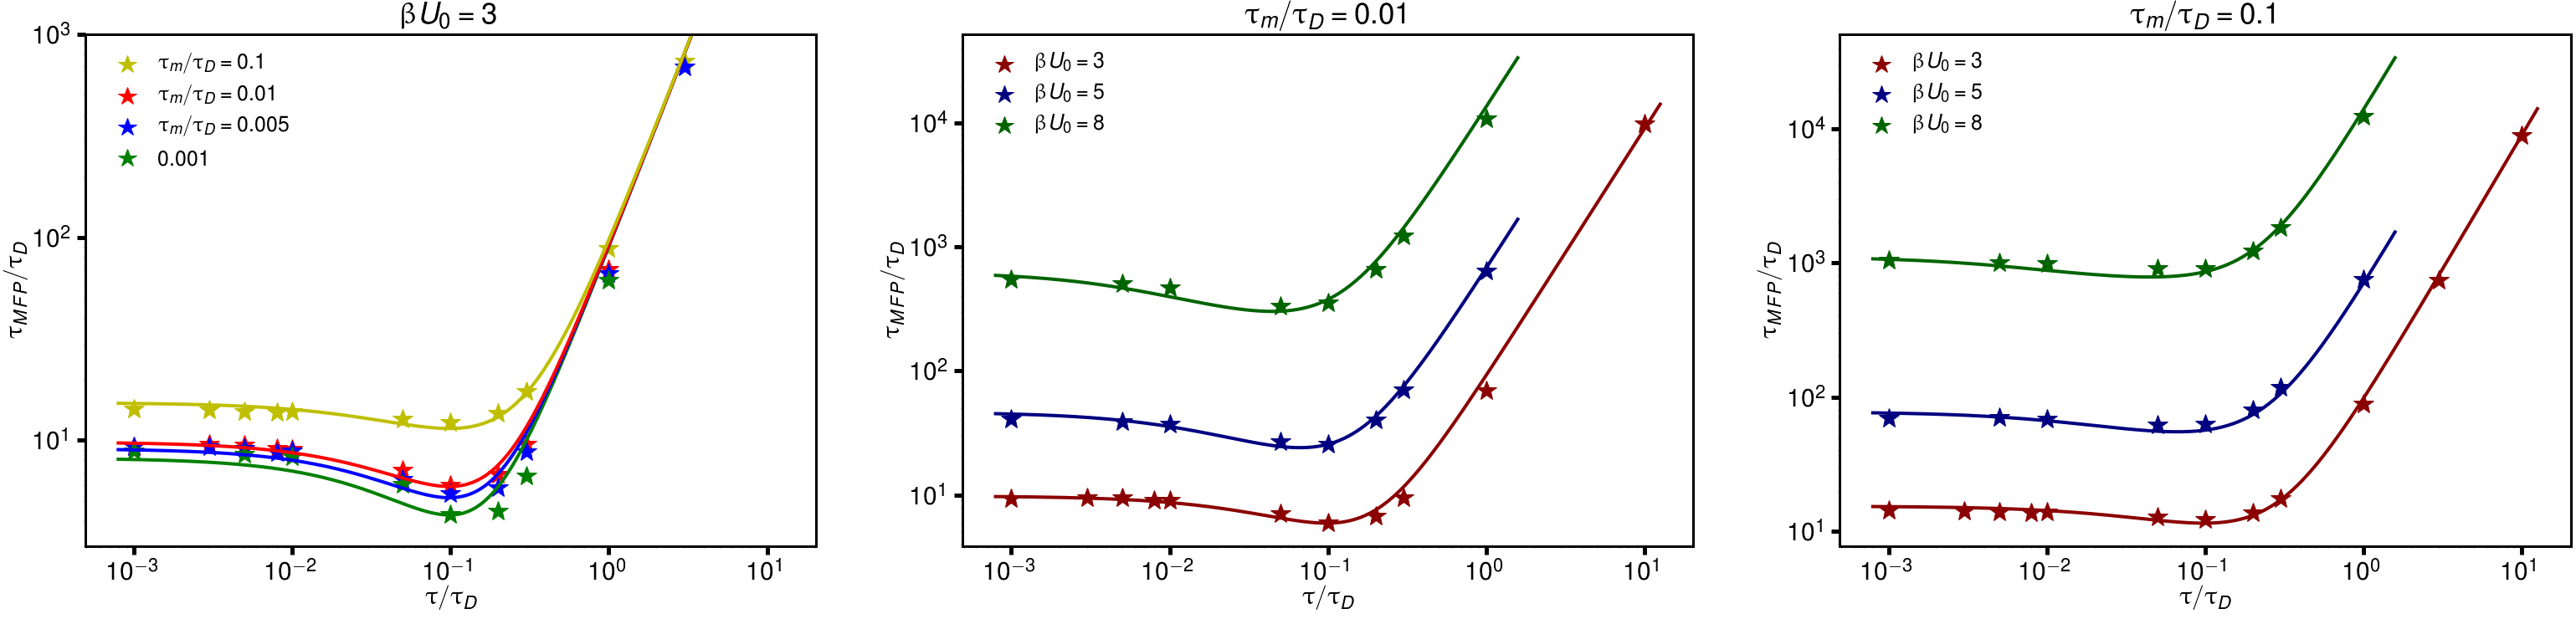

In [21]:
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, axes = plt.subplots(1, 3,figsize=(50,10))
    
    ax = axes[0]

    ax.plot(tauEq, xEq01[3,1:],'*',color='y',markersize=25,label='$\\tau_m/\\tau_D = 0.1$')
    ax.plot(tauEq, xEq001[3,1:],'*',color='r',markersize=25,label='$\\tau_m/\\tau_D = 0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*',color='b',markersize=25,label='$\\tau_m/\\tau_D = 0.005$')
    ax.plot(tauEqS, xEq0001[1,1:],'*',color='g',markersize=25,label='$0.001$')
   
    #ax.plot(taueq, Formula3(3.,taueq,0.005,16),'-',color='b',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,0.01,16),'-',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,0.1,16),'-',color='y',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Formula3(3.,taueq,0.005,10*3),'--',color='b',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,0.01,10*3),'--',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,0.1,10*3),'--',color='y',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Formula3(3.,taueq,0.005,5*3),':',color='b',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,0.01,5*3),':',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,0.1,5*3),':',color='y',linewidth=4,markersize=6)
    
    ax.plot(taueq, FormulaProva(3.,taueq,0.001,2*3,0),'-',color='g',linewidth=4,markersize=6)
    ax.plot(taueq, FormulaProva(3.,taueq,0.005,2*3,0),'-',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, FormulaProva(3.,taueq,0.01,2*3,0),'-',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, FormulaProva(3.,taueq,0.1,2*3,0),'-',color='y',linewidth=4,markersize=6)

    
    ax.set_ylim([3.,1000])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
    ax = axes[1]

    ax.plot(tauEq, xEq001[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[3,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[4,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    #ax.plot(taueq, Formula3(3.,taueq,0.01,16),'-',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(5.,taueqU,0.01,16),'-',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(8.,taueqU,0.01,16),'-',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Formula3(3.,taueq,0.01,10*3),'--',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(5.,taueqU,0.01,10*5),'--',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(8.,taueqU,0.01,10*8),'--',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Formula3(3.,taueq,0.01,5*3),':',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(5.,taueqU,0.01,5*5),':',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(8.,taueqU,0.01,5*8),':',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, FormulaProva(3.,taueq,0.01,2*3,0),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, FormulaProva(5.,taueqU,0.01,2*5,0),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, FormulaProva(8.,taueqU,0.01,2*8,0),'-',color='darkgreen',linewidth=4,markersize=6)
    
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.01$',fontsize=35)
    
    ax = axes[2]

    ax.plot(tauEq, xEq01[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[1,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[2,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
   
    #ax.plot(taueq, Formula3(3.,taueq,0.1,16),'-',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(5.,taueqU,0.1,16),'-',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(8.,taueqU,0.1,16),'-',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Formula3(3.,taueq,0.1,10*3),'--',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(5.,taueqU,0.1,10*5),'--',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(8.,taueqU,0.1,10*8),'--',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Formula3(3.,taueq,0.1,5*3),':',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(5.,taueqU,0.1,5*5),':',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqU, Formula3(8.,taueqU,0.1,5*8),':',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, FormulaProva(3.,taueq,0.1,2*3,0),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, FormulaProva(5.,taueqU,0.1,2*5,0),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, FormulaProva(8.,taueqU,0.1,2*8,0),'-',color='darkgreen',linewidth=4,markersize=6)
    
    
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)
    
    #ax.text(0.00000000035,40000,r'(a)', fontsize=30)
    #ax.text(0.0001,40000,r'(b)', fontsize=30)
       
    #ax.set_ylim([1.5,100])
   
    #fig.savefig('EquilibriumUT2.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

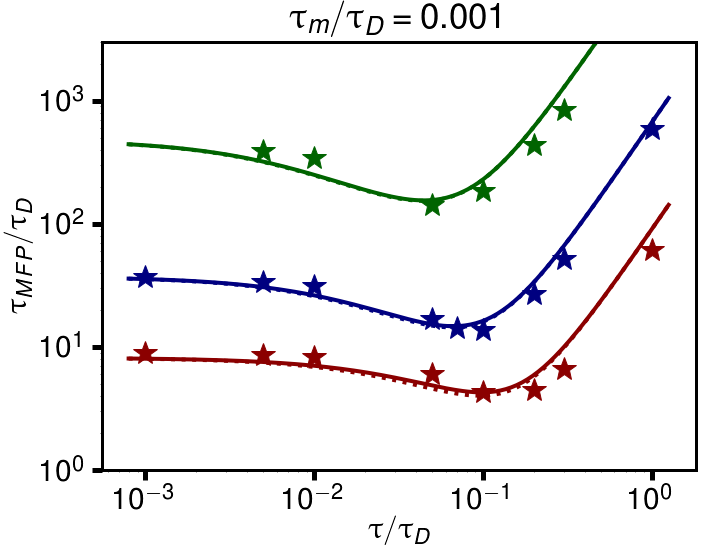

In [22]:
taueqs = np.logspace(-3.1,0.1,200)
taueqss = np.logspace(-3.1,0.05,200)
zeros = np.zeros(200)
#tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqS = [0.001,0.005,0.01,0.05,0.07,0.1,0.2,0.3,1]
tauEqSS = [0.001,0.005,0.01,0.05,0.07,0.1,0.2,0.3]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
   
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,0,16),'-',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,0,16),'-',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(8.,taueqs,0.001,0,16),'-',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,0,16),':',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,0,16),':',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqss, FormulaProva(8.,taueqss,0.001,0,16),':',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,10,3),'--',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,10,3),'--',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqss, FormulaProva(8.,taueqss,0.001,10,3),'--',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,15,5),'--',color='red',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,15,5),'--',color='blue',linewidth=4,markersize=6)
    #ax.plot(taueqss, FormulaProva(8.,taueqss,0.001,15,5),'--',color='green',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,2*3,0),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,2*5,0),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqss, FormulaProva(8.,taueqss,0.001,2*8,0),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,2*3,3),':',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,2*5,3),':',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqss, FormulaProva(8.,taueqss,0.001,2*8,3),':',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,10,0),'--',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,10,0),'--',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(8.,taueqs,0.001,10,0),'--',color='darkgreen',linewidth=4,markersize=6)

    ax.plot(tauEqS, xEq0001[1,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqS, xEq0001[2,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqSS, xEq0001[3,1:-1],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_ylim((1,3000))
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    #ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.001$',fontsize=35)
    
    #fig.savefig('M00001.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

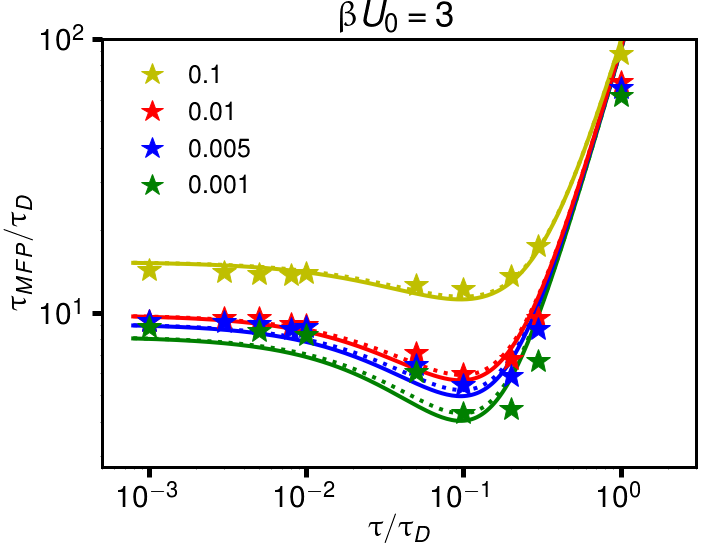

In [23]:
taueqs = np.logspace(-3.1,0.1,200)
taueqss = np.logspace(-3.1,0.05,200)
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))

    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,2*3,0),':',color='g',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.005,2*3,0),':',color='b',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.01,2*3,0),':',color='r',linewidth=4,markersize=6) 
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.1,2*3,0),':',color='y',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,2*3,3),'-',color='g',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.005,2*3,3),'-',color='b',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.01,2*3,3),'-',color='r',linewidth=4,markersize=6) 
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.1,2*3,3),'-',color='y',linewidth=4,markersize=6)
    
    ax.plot(tauEq, xEq01[3,1:],'*y',markersize=25,label='$0.1$')
    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    ax.plot(tauEqS, xEq0001[1,1:],'*',color='g',markersize=25,label='$0.001$')
       
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
       
    ax.set_ylim(top = 100)
    ax.set_xlim((0.0005,3))
    
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
   
    #fig.savefig('EquilibriumUT.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

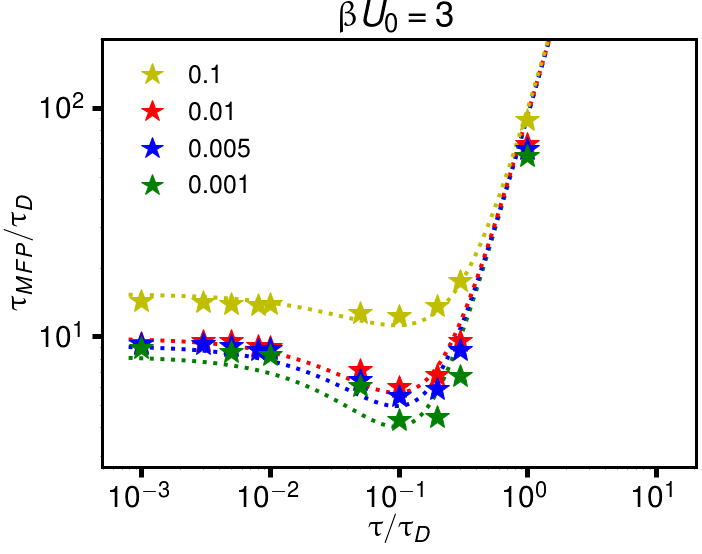

In [24]:
taueqs = np.logspace(-3.1,0.1,200)
taueqss = np.logspace(-3.1,0.05,200)
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
    
    #ax.plot(taueq, Formula2(3.,taueq,0.005,24,64/3,2/3),'-',color='b',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula2(3.,taueq,0.01,24,64/3,2/3),'-',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula2(3.,taueq,0.1,24,64/3,2/3),'-',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula2(3.,taueq,1,24,64/3,2/3),'-',color='g',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Formula3(3.,taueq,0.005,16),'-',color='b',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,0.01,16),'-',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,0.1,16),'-',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Formula3(3.,taueq,1,16),'.',color='g',linewidth=4,markersize=6)
    
    #ax.plot(taueq, Julian(3.,taueq,0.005,24,64/3,2/3),'--',color='b',linewidth=4,markersize=6)
    #ax.plot(taueq, Julian(3.,taueq,0.01,24,64/3,2/3),'--',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, Julian(3.,taueq,0.1,24,64/3,2/3),'--',color='y',linewidth=4,markersize=6)
    #ax.plot(taueq, Julian(3.,taueq,1,24,64/3,2/3),'--',color='g',linewidth=4,markersize=6)
    
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,0,16),'-',color='g',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,10,0),'--',color='g',linewidth=4,markersize=6)
    ax.plot(taueq, FormulaProva(3.,taueq,0.001,2*3,3),':',color='g',linewidth=4,markersize=6)
    ax.plot(taueq, FormulaProva(3.,taueq,0.005,2*3,3),':',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, FormulaProva(3.,taueq,0.01,2*3,3),':',color='r',linewidth=4,markersize=6) 
    ax.plot(taueq, FormulaProva(3.,taueq,0.1,2*3,3),':',color='y',linewidth=4,markersize=6)
    
    
    #ax.plot(tauEq, xEq1[1,1:],'*k',markersize=25,label='$10$')
    #ax.plot(tauEq, xEq1[2,1:],'*g',markersize=25,label='$1$')
    ax.plot(tauEq, xEq01[3,1:],'*y',markersize=25,label='$0.1$')
    #ax.plot(tauEq, xEq1[3,1:],'*m',markersize=25,label='$0.05$')
    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    ax.plot(tauEqS, xEq0001[1,1:],'*',color='g',markersize=25,label='$0.001$')
       
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.set_ylim(top = 200)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
   
    #fig.savefig('EquilibriumUT.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

In [60]:
def FormulaProva3(tau, b):
    return((np.exp(3)/(3))*((3*np.pi/(8*np.sqrt(2)))*0.001 + np.sqrt(2)*np.pi*3*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (b*3**2)*tau)) +2*np.sqrt(0.001*3)))

def FormulaProva5(tau, b):
    return((np.exp(5)/(5))*((3*np.pi/(8*np.sqrt(2)))*0.001 + np.sqrt(2)*np.pi*5*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (b*5**2)*tau)) +2*np.sqrt(0.001*5)))

def FormulaProva8(tau, b):
    return((np.exp(8)/(8))*((3*np.pi/(8*np.sqrt(2)))*0.001 + np.sqrt(2)*np.pi*8*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (b*8**2)*tau)) +2*np.sqrt(0.001*8)))

In [61]:
popt3, pcov3 = curve_fit(lambda tau,b,:FormulaProva3(tau, b), tauEqS, xEq0001[1,1:])
popt5, pcov5 = curve_fit(lambda tau,b,:FormulaProva5(tau, b), tauEqS, xEq0001[2,1:])
popt8, pcov8 = curve_fit(lambda tau,b,:FormulaProva8(tau, b), tauEqS, xEq0001[3,1:])

print(popt3)
print(popt5)
print(popt8)

ValueError: operands could not be broadcast together with shapes (8,) (9,) 

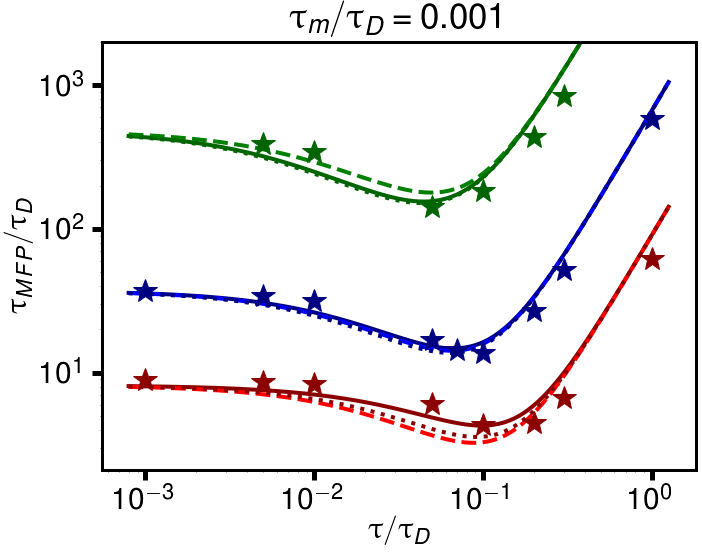

In [62]:
taueqs = np.logspace(-3.1,0.1,200)
zeros = np.zeros(200)
#tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqS = [0.001,0.005,0.01,0.05,0.07,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
   
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,0,16),'-',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,0,16),'-',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(8.,taueqs,0.001,0,16),'-',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,0,16),':',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,0,16),':',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(8.,taueqs,0.001,0,16),':',color='darkgreen',linewidth=4,markersize=6)
    
    #ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,10,0),'--',color='darkred',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,10,0),'--',color='navy',linewidth=4,markersize=6)
    #ax.plot(taueqs, FormulaProva(8.,taueqs,0.001,10,0),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,2*3,0),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,2*5,0),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(8.,taueqs,0.001,2*8,0),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,10,5),'--',color='r',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,10,5),'--',color='b',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(8.,taueqs,0.001,10,5),'--',color='g',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva(3.,taueqs,0.001,2*3,10),':',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(5.,taueqs,0.001,2*5,10),':',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva(8.,taueqs,0.001,2*8,10),':',color='darkgreen',linewidth=4,markersize=6)

    ax.plot(tauEqS, xEq0001[1,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqS, xEq0001[2,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqS, xEq0001[3,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.set_ylim(top = 2000)
        
    #ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.001$',fontsize=35)
    
    #fig.savefig('M00001.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

In [63]:
#Formula senza termine negativo accopiando H and L friction senza tau_D and tau_m
#def Formula2(U0,tau,M,K,a,b):
 #   return((np.exp(U0))*((3*np.pi/(8*np.sqrt(2)*U0))*(M + b*K*tau**2) + (2*np.sqrt(2)*np.pi/K)*(1/(1 + 3*K*a*tau/(8*4*U0))) +4*np.sqrt(2*M/K)))


In [64]:
#Eq. paper 2022
def My(U0,tau,M,K):
    return((np.exp(U0))*((3*np.pi/(8*np.sqrt(2)*U0))*(M + (2/3)*K*tau**2) + (2*np.sqrt(2)*np.pi/K)*(1/(1 + 3*K*(64/3)*tau/(8*4*U0))) +4*np.sqrt(2*M/K)))
#Eq. paper 2022 con termine di Julian
def MyJulian(U0,tau,M,K):
    return((np.exp(U0))*((3*np.pi/(8*np.sqrt(2)*U0))*(M + (2/3)*K*tau**2) + (2*np.sqrt(2)*np.pi/K)*(1/(1 + 10*U0*tau)) +4*np.sqrt(2*M/K)))
#K esplicito
def My2(U0,tau,M):
    return((np.exp(U0)/U0)*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + 16*tau)) +2*np.sqrt(U0*M)))
#Eq. paper 20220
def Julian(U0,tau,M):
    return((np.exp(U0)/U0)*((3*np.pi/(8*np.sqrt(2)))*M + 4*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + 10*U0*tau)) +2*np.sqrt(U0*M)))

def New(U0,tau,M):
    return((np.exp(U0)/U0)*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + 2*(U0**2)*tau)) +2*np.sqrt(U0*M)))

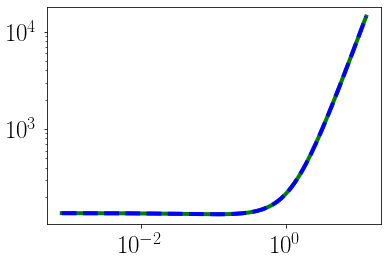

In [65]:
plt.plot(taueq, Formula2(3.,taueq,10,24,64/3,2/3),'g-',linewidth=4,markersize=6)
plt.plot(taueq, My(3.,taueq,10,24),'--',color='b',linewidth=4,markersize=6)

plt.xscale('log')
plt.yscale('log')

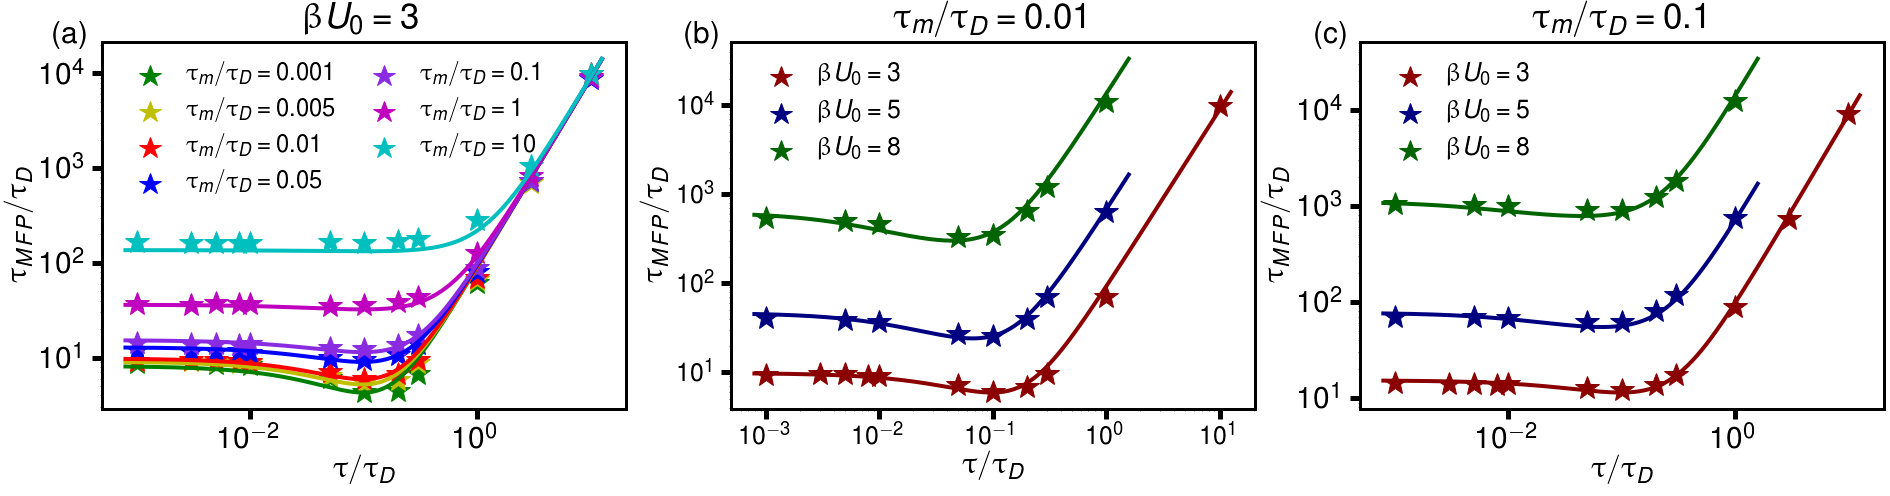

In [66]:
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, axes = plt.subplots(1, 3,figsize=(30,6))
    
    ax = axes[0]

    ax.plot(tauEqS, xEq0001[1,1:],'*',color='g',markersize=25,label='$\\tau_m/\\tau_D = 0.001$')
    ax.plot(tauEq, xEq1[4,1:],'*',color='y',markersize=25,label='$\\tau_m/\\tau_D = 0.005$')
    ax.plot(tauEq, xEq001[3,1:],'*',color='r',markersize=25,label='$\\tau_m/\\tau_D = 0.01$')
    ax.plot(tauEq, xEq1[3,1:],'*',color='b',markersize=25,label='$\\tau_m/\\tau_D = 0.05$')
    ax.plot(tauEq, xEq01[3,1:],'*',color='blueviolet',markersize=25,label='$\\tau_m/\\tau_D = 0.1$')
    ax.plot(tauEq, xEq1[2,1:],'*',color='m',markersize=25,label='$\\tau_m/\\tau_D = 1$')
    ax.plot(tauEq, xEq1[1,1:],'*',color='c',markersize=25,label='$\\tau_m/\\tau_D = 10$')
    
    
    ax.plot(taueq, New(3.,taueq,0.001),'-',color='g',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,0.005),'-',color='y',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,0.01),'-',color='r',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,0.05),'-',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,0.1),'-',color='blueviolet',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,1),'-',color='m',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,10),'-',color='c',linewidth=4,markersize=6)
    
    #ax.set_ylim([1.5,100000000])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.tick_params(axis='both',labelsize=25,length = 10,width = 5)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=24, ncol = 2, loc = 'upper left')
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
    ax = axes[1]

    ax.plot(tauEq, xEq001[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[3,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[4,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
    
    ax.plot(taueq, New(3.,taueq,0.01),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, New(5.,taueqU,0.01),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, New(8.,taueqU,0.01),'-',color='darkgreen',linewidth=4,markersize=6)
    
    
    ax.set_xscale('log')
    ax.set_yscale('log')
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.01$',fontsize=35)
    
    ax.tick_params(axis='both',labelsize=25,length = 10,width = 5)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
    
    ax = axes[2]

    ax.plot(tauEq, xEq01[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[1,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[2,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
    
    ax.plot(taueq, New(3.,taueq,0.1),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, New(5.,taueqU,0.1),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, New(8.,taueqU,0.1),'-',color='darkgreen',linewidth=4,markersize=6)
    
    
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.tick_params(axis='both',labelsize=25,length = 10,width = 5)
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)

    ax.text(0.0000000000000015,50000,r'(a)', fontsize=30)
    ax.text(0.00000000055,50000,r'(b)', fontsize=30)
    ax.text(0.0002,50000,r'(c)', fontsize=30)
    
    #fig.savefig('Equilibrium.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

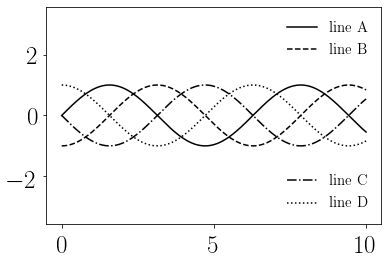

In [67]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                     styles[i], color='black')
ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'],
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
             loc='lower right', frameon=False)
ax.add_artist(leg);


In [68]:
xEq0001[1,1:]

array([ 8.88427329,  8.57925377,  8.28634707,  6.05914995,  0.        ,
        4.30112418,  4.46025921,  6.6887492 , 61.75608787])

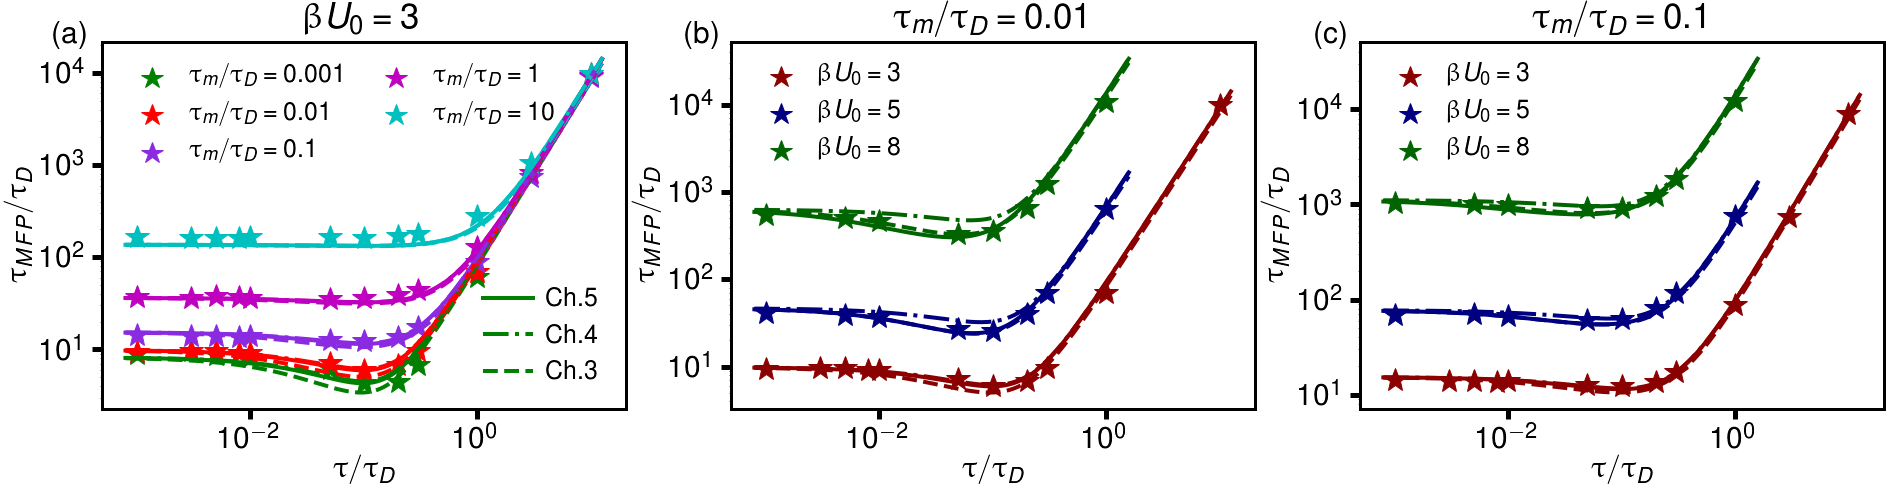

In [69]:
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, axes = plt.subplots(1, 3,figsize=(30,6))
    
    ax = axes[0]
    #ax.plot(tauEq, xEq1[3,1:],'*',color='b',markersize=25,label='$\\tau_m/\\tau_D = 0.05$')
    #ax.plot(tauEq, xEq1[4,1:],'*',color='y',markersize=25,label='$\\tau_m/\\tau_D = 0.005$')
    ax.plot(tauEqS, xEq0001[1,1:],'*',color='g',markersize=25,label='$\\tau_m/\\tau_D = 0.001$')
    ax.plot(tauEq, xEq001[3,1:],'*',color='r',markersize=25,label='$\\tau_m/\\tau_D = 0.01$')
    ax.plot(tauEq, xEq01[3,1:],'*',color='blueviolet',markersize=25,label='$\\tau_m/\\tau_D = 0.1$')
    ax.plot(tauEq, xEq1[2,1:],'*',color='m',markersize=25,label='$\\tau_m/\\tau_D = 1$')
    ax.plot(tauEq, xEq1[1,1:],'*',color='c',markersize=25,label='$\\tau_m/\\tau_D = 10$')
    
    line1, =ax.plot(taueq, New(3.,taueq,0.001),'-',color='g',linewidth=4,markersize=6)
    #ax.plot(taueq, New(3.,taueq,0.005),'-',color='y',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,0.01),'-',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, New(3.,taueq,0.05),'-',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,0.1),'-',color='blueviolet',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,1),'-',color='m',linewidth=4,markersize=6)
    ax.plot(taueq, New(3.,taueq,10),'-',color='c',linewidth=4,markersize=6)
    
    line2, =ax.plot(taueq, Julian(3.,taueq,0.001),'--',color='g',linewidth=4,markersize=6)
    #ax.plot(taueq, Julian(3.,taueq,0.005),'--',color='y',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.01),'--',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, Julian(3.,taueq,0.05),'--',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,0.1),'--',color='blueviolet',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,1),'--',color='m',linewidth=4,markersize=6)
    ax.plot(taueq, Julian(3.,taueq,10),'--',color='c',linewidth=4,markersize=6)
    
    line3, =ax.plot(taueq, My(3.,taueq,0.001,24),'-.',color='g',linewidth=4,markersize=6)
    #ax.plot(taueq, My(3.,taueq,0.005,24),'-.',color='y',linewidth=4,markersize=6)
    ax.plot(taueq, My(3.,taueq,0.01,24),'-.',color='r',linewidth=4,markersize=6)
    #ax.plot(taueq, My(3.,taueq,0.05,24),'-.',color='b',linewidth=4,markersize=6)
    ax.plot(taueq, My(3.,taueq,0.1,24),'-.',color='blueviolet',linewidth=4,markersize=6)
    ax.plot(taueq, My(3.,taueq,1,24),'-.',color='m',linewidth=4,markersize=6)
    ax.plot(taueq, My(3.,taueq,10,24),'-.',color='c',linewidth=4,markersize=6)
    
    #ax.set_ylim([1.5,100000000])
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    #ax.legend(fontsize=25, ncol = 1)
    #first_legend = ax.legend([line1,line2,line3],['Eq.6','Eq.A1','Eq.A2'],bbox_to_anchor=(0.68, 0.4),fontsize=25)
    first_legend = ax.legend([line1,line3,line2],['Ch.5','Ch.4','Ch.3'],bbox_to_anchor=(0.68, 0.4),fontsize=25)
    
    ax.add_artist(first_legend)
    ax.legend(fontsize=25, ncol = 2)
    
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
    ax = axes[1]

    ax.plot(tauEq, xEq001[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[3,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[4,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
    
    ax.plot(taueq, New(3.,taueq,0.01),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, New(5.,taueqU,0.01),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, New(8.,taueqU,0.01),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.01),'--',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(5.,taueqU,0.01),'--',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(8.,taueqU,0.01),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, My(3.,taueq,0.01,24),'-.',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, My(5.,taueqU,0.01,8*5),'-.',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, My(8.,taueqU,0.01,8*8),'-.',color='darkgreen',linewidth=4,markersize=6)
    
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.01$',fontsize=35)
    
    ax = axes[2]

    ax.plot(tauEq, xEq01[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[1,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[2,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
    
    ax.plot(taueq, New(3.,taueq,0.1),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, New(5.,taueqU,0.1),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, New(8.,taueqU,0.1),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, Julian(3.,taueq,0.1),'--',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(5.,taueqU,0.1),'--',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, Julian(8.,taueqU,0.1),'--',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, My(3.,taueq,0.1, 8*3),'-.',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, My(5.,taueqU,0.1, 8*5),'-.',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, My(8.,taueqU,0.1, 8*8),'-.',color='darkgreen',linewidth=4,markersize=6)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)
    
    ax.text(0.0000000000000015,50000,r'(a)', fontsize=30)
    ax.text(0.00000000055,50000,r'(b)', fontsize=30)
    ax.text(0.0002,50000,r'(c)', fontsize=30)
    
    #fig.savefig('EquilibriumCompareThesi.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

In [35]:
def NewGen(U0,tau,M,c):
    return((np.exp(U0)/U0)*((3*np.pi/(8*np.sqrt(2)))*M + np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + c*(U0**2)*tau)) +2*np.sqrt(U0*M)))

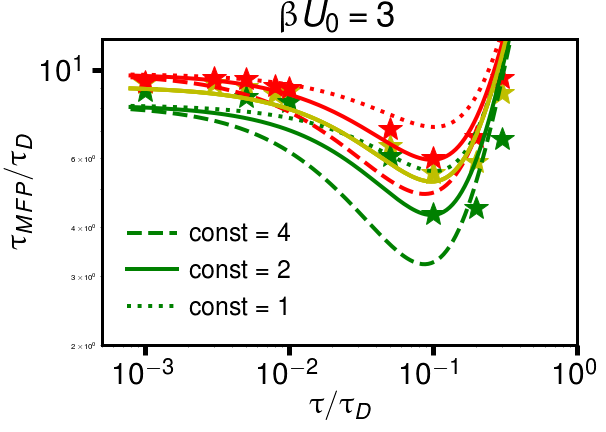

In [36]:
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(8,5))
    
    ax.plot(tauEq, xEq1[4,1:],'*',color='y',markersize=25)#,label='$\\tau_m/\\tau_D = 0.005$')
    ax.plot(tauEqS, xEq0001[1,1:],'*',color='g',markersize=25)#,label='$\\tau_m/\\tau_D = 0.001$')
    ax.plot(tauEq, xEq001[3,1:],'*',color='r',markersize=25)#,label='$\\tau_m/\\tau_D = 0.01$')
    
    ax.plot(taueq, NewGen(3.,taueq,0.001,4),'--',color='g',linewidth=4,markersize=6, label = 'const = 4')
    ax.plot(taueq, New(3.,taueq,0.005),'-',color='y',linewidth=4,markersize=6)
    ax.plot(taueq, NewGen(3.,taueq,0.01,4),'--',color='r',linewidth=4,markersize=6)
    
    ax.plot(taueq, NewGen(3.,taueq,0.001,2),'-',color='g',linewidth=4,markersize=6, label = 'const = 2')
    ax.plot(taueq, New(3.,taueq,0.005),'-',color='y',linewidth=4,markersize=6)
    ax.plot(taueq, NewGen(3.,taueq,0.01,2),'-',color='r',linewidth=4,markersize=6)
    
    ax.plot(taueq, NewGen(3.,taueq,0.001,1),':',color='g',linewidth=4,markersize=6, label = 'const = 1')
    ax.plot(taueq, New(3.,taueq,0.005),'-',color='y',linewidth=4,markersize=6)
    ax.plot(taueq, NewGen(3.,taueq,0.01,1),':',color='r',linewidth=4,markersize=6)
    
    ax.set_xlim([0.0005, 1])
    ax.set_ylim([2, 12])
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)

    ax.legend(fontsize=25, ncol = 1)
    
    ax.tick_params('both',labelsize=30,length = 10,width = 5)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
    
    #fig.savefig('EquilibriumCompareConstant.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

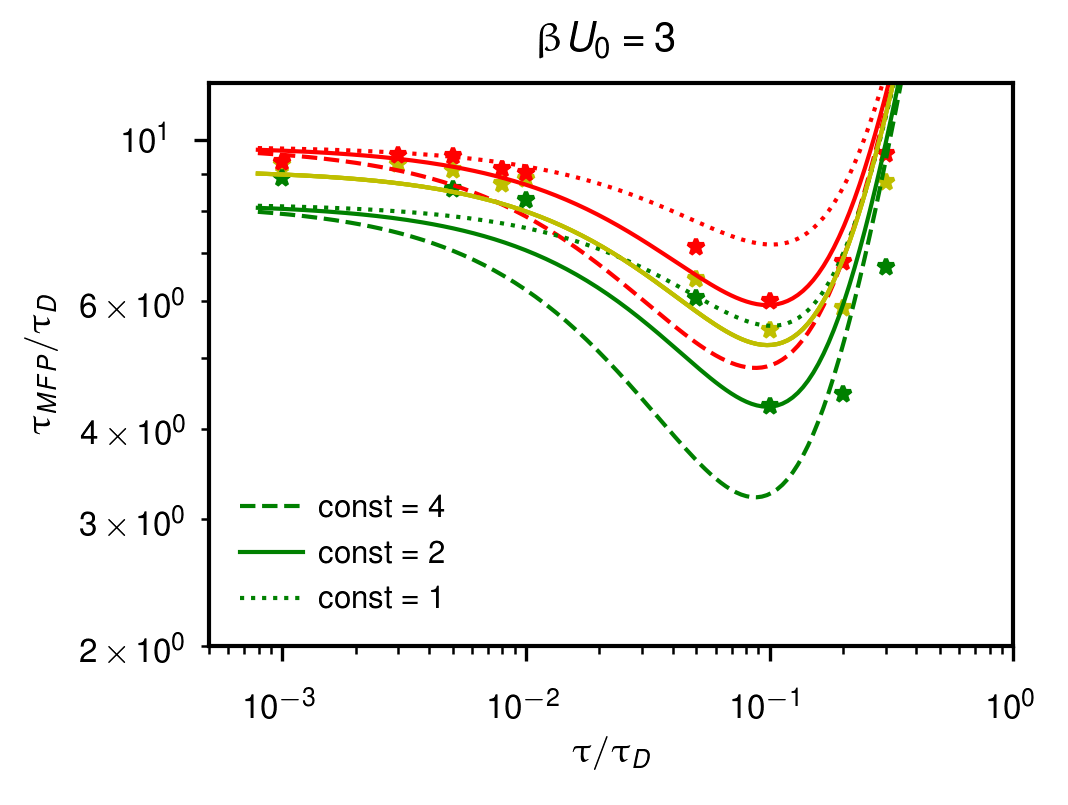

In [37]:
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1, dpi=300)
    
    ax.plot(tauEq, xEq1[4,1:],'*',color='y')#,label='$\\tau_m/\\tau_D = 0.005$')
    ax.plot(tauEqS, xEq0001[1,1:],'*',color='g')#,label='$\\tau_m/\\tau_D = 0.001$')
    ax.plot(tauEq, xEq001[3,1:],'*',color='r')#,label='$\\tau_m/\\tau_D = 0.01$')
    
    ax.plot(taueq, NewGen(3.,taueq,0.001,4),'--',color='g', label = 'const = 4')
    ax.plot(taueq, New(3.,taueq,0.005),'-',color='y')
    ax.plot(taueq, NewGen(3.,taueq,0.01,4),'--',color='r')
    
    ax.plot(taueq, NewGen(3.,taueq,0.001,2),'-',color='g', label = 'const = 2')
    ax.plot(taueq, New(3.,taueq,0.005),'-',color='y')
    ax.plot(taueq, NewGen(3.,taueq,0.01,2),'-',color='r')
    
    ax.plot(taueq, NewGen(3.,taueq,0.001,1),':',color='g', label = 'const = 1')
    ax.plot(taueq, New(3.,taueq,0.005),'-',color='y')
    ax.plot(taueq, NewGen(3.,taueq,0.01,1),':',color='r')
    
    ax.set_xlim([0.0005, 1])
    ax.set_ylim([2, 12])
    
#     for spine in ['top', 'bottom', 'left', 'right']:
#         ax.spines[spine].set_linewidth(3)

    ax.legend(ncol = 1)
    
#     ax.tick_params(labelsize=30,length = 10,width = 5)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$')
    ax.set_xlabel('$\\tau/\\tau_D$')
    ax.set_title('$\\beta U_0 =3$')      
    
    #fig.savefig('EquilibriumINGRANDIMENTO.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

In [38]:
from sympy import Symbol

In [39]:
def M1(tau, c):
    return ((np.exp(3)/3)*((3*np.pi/(8*np.sqrt(2)))*0.01 + np.sqrt(2)*np.pi*3*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + c*(3**2)*tau)) +2*np.sqrt(3*0.01)))
def M5(tau, c):
    return ((np.exp(3)/3)*((3*np.pi/(8*np.sqrt(2)))*0.005 + np.sqrt(2)*np.pi*3*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + c*(3**2)*tau)) +2*np.sqrt(3*0.005)))
def M01(tau, c):
    return ((np.exp(3)/3)*((3*np.pi/(8*np.sqrt(2)))*0.001 + np.sqrt(2)*np.pi*3*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + c*(3**2)*tau)) +2*np.sqrt(3*0.001)))

In [40]:
popt1, pcov = curve_fit(M1, tauEq, xEq001[3,1:])
print(popt1)
popt5, pcov = curve_fit(M5, tauEq, xEq1[4,1:])
print(popt5)
popt01, pcov = curve_fit(M01, tauEqS, xEq0001[1,1:])
print(popt01)

[8.98774948]
[23.51883341]
[4.52578983]


In [41]:
print(NewGen(3.,0.1,0.001,2))
print(xEq0001[1,7])
print(NewGen(3.,0.1,0.01,2))
print(xEq001[3,7])
print(NewGen(3.,0.1,0.005,2))
print(xEq1[4,7])

4.287257968853738
4.46025921041
5.923312088806791
5.9947398
5.2161245034045285
5.467749795221915


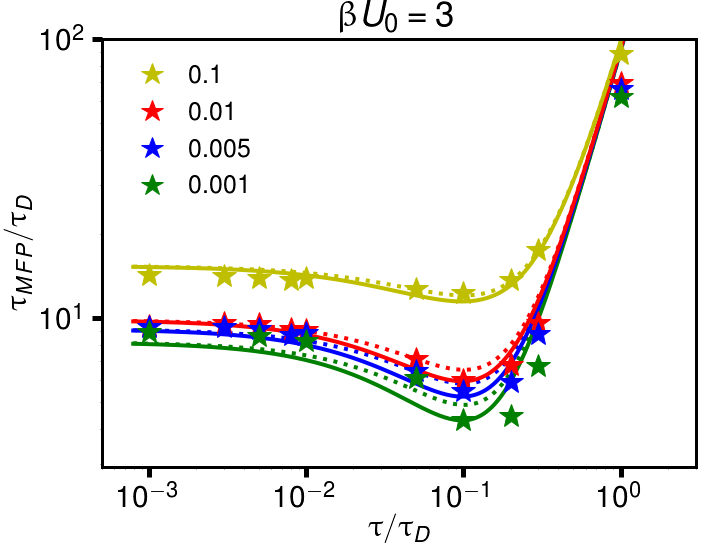

In [42]:
taueqs = np.logspace(-3.1,0.1,200)
taueqss = np.logspace(-3.1,0.05,200)
taueq = np.logspace(-3.1,1.1,200)
taueqU = np.logspace(-3.1,0.2,200)
zeros = np.zeros(200)
tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqU = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))

    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.001,1.7),':',color='g',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.005,1.7),':',color='b',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.01,1.7),':',color='r',linewidth=4,markersize=6) 
    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.1,1.7),':',color='y',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.001,2),'-',color='g',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.005,2),'-',color='b',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.01,2),'-',color='r',linewidth=4,markersize=6) 
    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.1,2),'-',color='y',linewidth=4,markersize=6)
    
    ax.plot(tauEq, xEq01[3,1:],'*y',markersize=25,label='$0.1$')
    ax.plot(tauEq, xEq001[3,1:],'*r',markersize=25,label='$0.01$')
    ax.plot(tauEq, xEq1[4,1:],'*b',markersize=25,label='$0.005$')
    ax.plot(tauEqS, xEq0001[1,1:],'*',color='g',markersize=25,label='$0.001$')
       
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
       
    ax.set_ylim(top = 100)
    ax.set_xlim((0.0005,3))
    
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\beta U_0 =3$',fontsize=35)      
   
    #fig.savefig('EquilibriumUT.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()  

ValueError: x and y must have same first dimension, but have shapes (8,) and (9,)

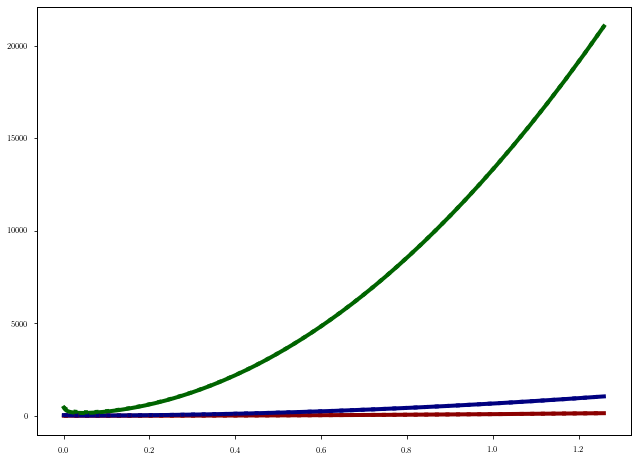

In [43]:
taueqs = np.logspace(-3.1,0.1,200)
zeros = np.zeros(200)
#tauEq = [0.001,0.003,0.005,0.008,0.01,0.05,0.1,0.2,0.3,1,3,10]
tauEqS = [0.001,0.005,0.01,0.05,0.1,0.2,0.3,1]
         
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))

    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.001,2),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva2(5.,taueqs,0.001,2),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva2(8.,taueqs,0.001,2),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueqs, FormulaProva2(3.,taueqs,0.001,1.7),':',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva2(5.,taueqs,0.001,1.7),':',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqs, FormulaProva2(8.,taueqs,0.001,1.7),':',color='darkgreen',linewidth=4,markersize=6)

    ax.plot(tauEqS, xEq0001[1,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqS, xEq0001[2,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqS, xEq0001[3,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.set_ylim(top = 2000)
        
    #ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.001$',fontsize=35)
    
    #fig.savefig('M00001.pdf',bbox_inches='tight')#,fonttype=42)
    plt.show(fig)
    plt.close(fig)
my_plot()     

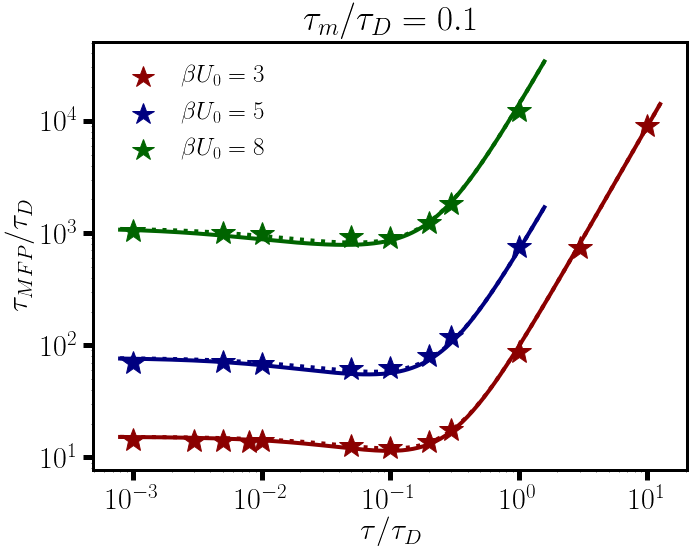

In [44]:
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
    ax.plot(tauEq, xEq01[3,1:],'*',color='darkred',markersize=25,label='$\\beta U_0 = 3$')
    ax.plot(tauEqU, xU[1,1:],'*',color='navy',markersize=25,label='$\\beta U_0 = 5$')
    ax.plot(tauEqU, xU[2,1:],'*',color='darkgreen',markersize=25,label='$\\beta U_0 = 8$')
    
    ax.plot(taueq, FormulaProva2(3.,taueq,0.1,2),'-',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, FormulaProva2(5.,taueqU,0.1,2),'-',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, FormulaProva2(8.,taueqU,0.1,2),'-',color='darkgreen',linewidth=4,markersize=6)
    
    ax.plot(taueq, FormulaProva2(3.,taueq,0.1,1.7),':',color='darkred',linewidth=4,markersize=6)
    ax.plot(taueqU, FormulaProva2(5.,taueqU,0.1,1.7),':',color='navy',linewidth=4,markersize=6)
    ax.plot(taueqU, FormulaProva2(8.,taueqU,0.1,1.7),':',color='darkgreen',linewidth=4,markersize=6)
    
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1)
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau_{MFP}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\tau/\\tau_D$',fontsize=30)
    ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)
my_plot() 

In [45]:
xEq001[3,1:]

array([9.33526650e+00, 9.55594787e+00, 9.52589280e+00, 9.11708152e+00,
       9.02082580e+00, 7.11550068e+00, 5.99473980e+00, 6.78645820e+00,
       9.56882026e+00, 6.96515997e+01, 0.00000000e+00, 9.84914954e+03])

In [46]:
xEqS = np.genfromtxt('Equilibrium/tauM(1-01-001)tau(008)U(3-5-8).txt')
print(xEqS[2,1:-1])

ValueError: Some errors were detected !
    Line #2 (got 8 columns instead of 9)
    Line #6 (got 5 columns instead of 9)
    Line #7 (got 5 columns instead of 9)
    Line #8 (got 5 columns instead of 9)

In [47]:
U0 = np.linspace(2.5,8.5,50)
def FuncU(U0,a):
    return((np.exp(U0)/(U0))*(np.sqrt(2)*np.pi*U0*0.08**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (2*U0**a)*0.08))))

u = (3,5,8)

M3 = np.min(xEq0001[1,1:])
M5 = np.min(xEq0001[2,1:])
M8 = np.min(xEq0001[3,3:])
IM3 = np.argmin(xEq0001[1,1:])
IM5 = np.argmin(xEq0001[2,1:])
IM8 = np.argmin(xEq0001[3,3:])

M = (M3, M5, M8)
IM = (xEq0001[0,1+IM3],  xEq0001[0,1+IM5], xEq0001[0,3+IM8])

M301 = np.min(xEq01[3,1:])
M501 = np.min(xU[1,1:])
M801 = np.min(xU[2,1:])
IM301 = np.argmin(xEq01[3,1:])
IM501 = np.argmin(xU[1,1:])
IM801 = np.argmin(xU[2,1:])

IM01 = (xEq01[0,1+IM301],  xU[0,1+IM501], xU[0,1+IM801])
M01 = (M301, M501, M801)


M3001 = np.min(xEq001[3,1:-2])
M5001 = np.min(xU[3,1:])
M8001 = np.min(xU[4,1:])
IM3001 = np.argmin(xEq001[3,1:-2])
IM5001 = np.argmin(xU[3,1:])
IM8001 = np.argmin(xU[4,1:])

IM001 = (xEq001[0,1+IM3001],  xU[0,1+IM5001], xU[0,1+IM8001])
M001 = (M3001, M5001, M8001)

poptU, pcovU = curve_fit(lambda U0,a,:FuncU(U0,a), u, M)
#print(poptU)

Min301=np.min(xEqS[1,2:])
Min3001=np.min(xEqS[2,1:-1])
Min30001=np.min(xEqS[3,1:])

IMS301 = np.argmin(xEqS[1,2:])
IMS3001 = np.argmin(xEqS[2,1:-1])
IMS30001 = np.argmin(xEqS[3,1:])

NameError: name 'xEqS' is not defined

In [48]:
#Funzione 2022
def FuncTL(U0,tau):
    return((np.exp(U0)/(U0))*(np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (2*U0**2)*tau))))

#Funzione pubblicata 2018
def FuncTY(U0,tau):
    return((np.exp(U0)/(U0))*(np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (10*U0)*tau))))

#Funzione pubblicata 2022
def FuncTPL(U0,tau):
    return((np.exp(U0)/(U0))*(np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + 16*tau))))

In [49]:
print(IM)
print(IM01)
print(IM001)

(0.07, 0.1, 0.07)
(0.1, 0.05, 0.1)
(0.1, 0.1, 0.05)


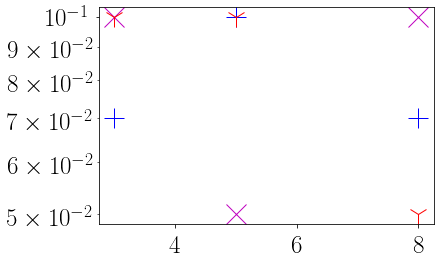

In [50]:
plt.plot(u,IM, '+b', markersize=20)
plt.plot(u,IM01, 'xm',markersize=20)
plt.plot(u,IM001, '1r',markersize=20)

#plt.plot(U,M, '--b')

#plt.plot(U0, FuncU(U0,1.7), '--r')

#plt.xscale('log')
plt.yscale('log')

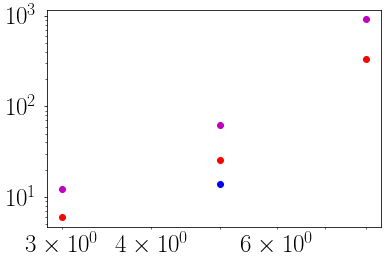

In [51]:
plt.plot(u,M, 'ob')
plt.plot(u,M01, 'om')
plt.plot(u,M001, 'or')

#plt.plot(U,M, '--b')

#plt.plot(U0, FuncU(U0,1.7), '--r')

plt.xscale('log')
plt.yscale('log')


In [52]:
from sympy import *
U0 = Symbol('U0', real=True)
tau = Symbol('tau', real=True)

FuncTL=((exp(U0)/(U0))*(sqrt(2)*pi*U0*tau**2 + (pi/(2*sqrt(2)))*(1/(1 + (2*U0**2)*tau))))

FuncTY=((exp(U0)/(U0))*(sqrt(2)*pi*U0*tau**2 + (pi/(2*sqrt(2)))*(1/(1 + (10*U0)*tau))))

FuncTPL=((exp(U0)/(U0))*(sqrt(2)*pi*U0*tau**2 + (pi/(2*sqrt(2)))*(1/(1 + 16*tau))))

TLprime = FuncTL.diff(tau)
TYprime = FuncTY.diff(tau)
TPLprime = FuncTPL.diff(tau)

In [53]:
from scipy.optimize import minimize

TL = [0 for x in range(30)]
def FuncTL(tau, U0):
    return ((exp(U0)/(U0))*(np.sqrt(2)*np.pi*U0*tau**2 + (np.pi/(2*np.sqrt(2)))*(1/(1 + (2*U0**2)*tau))))

for i in range(2, 32):
    min_x = minimize(FuncTL, 0.1, i, bounds=((0.01, 1),)).x
    TL[i-2] = min_x
tl = np.concatenate(TL, axis=0 )
#print(tl)   

In [54]:
TY = [0 for x in range(30)]
def FuncTY(tau, U0):
    return ((exp(U0)/(U0))*(sqrt(2)*pi*U0*tau**2 + (pi/(2*sqrt(2)))*(1/(1 + (10*U0)*tau))))

for i in range(2, 32):
    min_x = minimize(FuncTY, 0.1, i, bounds=((0.01, 1),)).x
    TY[i-2] = min_x
ty = np.concatenate(TY, axis=0 )
print(ty) 

[0.1149098  0.0905291  0.07623319 0.06662779 0.05963704 0.05427323
 0.05       0.04649834 0.04356538 0.0410653  0.03890341 0.03701142
 0.03533877 0.03384712 0.0325068  0.03129447 0.03019149 0.02918278
 0.02825598 0.02740087 0.0266089  0.02587289 0.02518671 0.02454514
 0.02394369 0.02337845 0.02284605 0.0223435  0.02186821 0.02141785]


In [55]:
TPL = [0 for x in range(30)]
def FuncTPL(tau, U0):
    return ((exp(U0)/(U0))*(sqrt(2)*pi*U0*tau**2 + (pi/(2*sqrt(2)))*(1/(1 + 16*tau))))

for i in range(2, 32):
    min_x = minimize(FuncTPL, 0.1, i, bounds=((0.01, 1),)).x
    TPL[i-2] = min_x
tpl = np.concatenate(TPL, axis=0 )
#print(tpl) 

In [56]:
print(tl[4]) 
print(ty[4]) 
print(tpl[4]) 

0.057221536696995104
0.05963704275985574
0.07198892498683586


In [57]:
#ty = (0.1149098,0.0905291,0.0762331)  
from scipy.optimize import curve_fit

U = np.linspace(2,32,30)
U1 = (3,5,8)

def funcU2(U0,a, b):
    return a*U0**b 

def funcU3(U0, b):
    return U0**b 

poptTL, pcov =  curve_fit(funcU2, U, tl)
poptTY, pcov = curve_fit(funcU2,U, ty)
poptTPL, pcov = curve_fit(funcU2,U, tpl)

poptTL3, pcov =  curve_fit(funcU3, U, tl)
poptTY3, pcov = curve_fit(funcU3,U, ty)
poptTPL3, pcov = curve_fit(funcU3,U, tpl)

print(poptTL)
print(poptTY)
print(poptTPL)

print(poptTL3)
print(poptTY3)
print(poptTPL3)

[ 0.22939263 -0.79854809]
[ 0.17627447 -0.60274209]
[ 0.1716644  -0.49158626]
[-2.31720252]
[-2.38153851]
[-2.15726706]


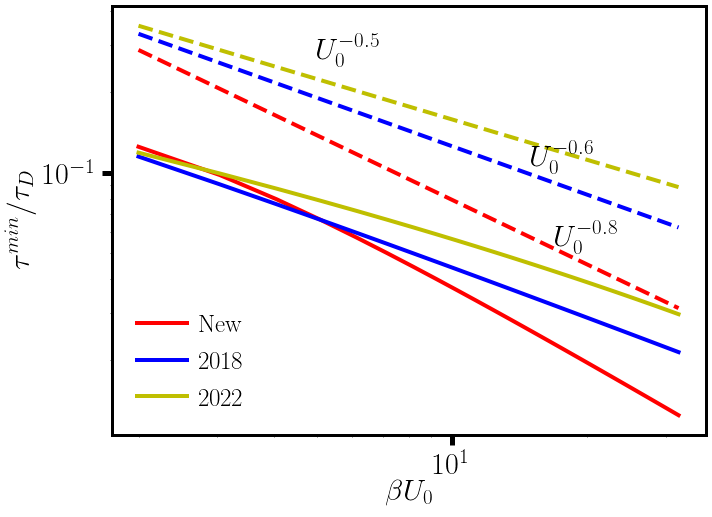

In [58]:
@mpltex.acs_decorator
def my_plot():       
    fig, ax = plt.subplots(1, 1,figsize=(10,7))
    ax.plot(U, TL,'r',linewidth=4,label='New')
    ax.plot(U, TY,'b',linewidth=4,label='2018')
    ax.plot(U, TPL,'y',linewidth=4,label='2022')

    #ax.plot(U, funcU3(U, -0.5),'--k',linewidth=4)
    
    ax.plot(U, funcU2(U,0.5, -0.8),'--r',linewidth=4)
    ax.plot(U, funcU2(U,0.5, -0.6),'--b',linewidth=4)
    ax.plot(U, funcU2(U, 0.5,-0.5),'--y',linewidth=4)
    
    ax.text(5, 0.25, r'$$ U_0^{-0.5}$$',fontsize=30)
    ax.text(15, 0.1, r'$$ U_0^{-0.6}$$',fontsize=30)
    ax.text(17, 0.05, r'$$ U_0^{-0.8}$$',fontsize=30)


    #ax.plot(U1,IM, '+g', markersize=25)
    #ax.plot(U1,IM01, 'xm',markersize=25)
    #ax.plot(U1,IM001, '1k',markersize=25)
    
    #ax.plot(3, 0.09, '+g', markersize=25)
    #ax.plot(3, 0.1, 'xm', markersize=25)
    #ax.plot(3, 0.11, '1k', markersize=25)
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    #plt.ylim([0.0005, 0.2])
    
    for spine in ['top', 'bottom', 'left', 'right']:
        ax.spines[spine].set_linewidth(3)
        
    ax.legend(fontsize=25, ncol = 1, loc='lower left')
    ax.tick_params(labelsize=30,length = 10,width = 5)
    ax.set_ylabel('$\\tau^{min}/\\tau_D$',fontsize=30)
    ax.set_xlabel('$\\beta U_0$',fontsize=30)
    #ax.set_title('$\\tau_m/\\tau_D = 0.1$',fontsize=35)
my_plot() 